In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
data_df = pd.read_json('./dataset/complete_clean.json')
data_df

,pattern,type
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
90248,<img onpointerenter=alert(1)>xss</img>,xss
90249,"<source onbeforepaste=""alert(1)"" contenteditab...",xss
90250,"<div draggable=""true"" contenteditable>drag me<...",xss
90251,"<li><cite id=""citerefdomingos2015"" class=""cita...",valid


<Axes: ylabel='count'>

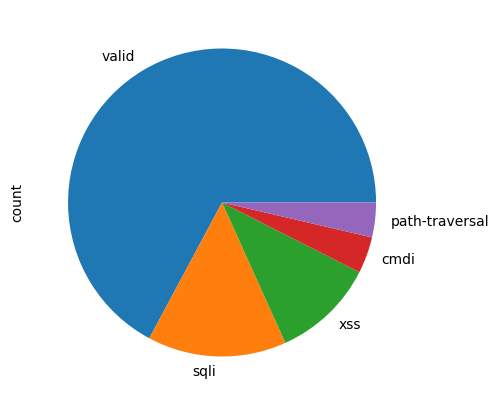

In [4]:
counts = data_df['type'].value_counts()

counts.plot.pie(figsize=(5, 5))

In [6]:
X = data_df['pattern'].to_numpy().astype(str)
Y = data_df['type'].to_numpy().astype(str)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify = Y)

np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

pipe = make_pipeline(TfidfVectorizer(input='content', lowercase=True, analyzer='char', max_features=1024), SVC())
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)],
    'svc__C': [1, 10],
    'svc__kernel': ['linear', 'rbf']
}

grid = GridSearchCV(pipe, param_grid, cv=2, verbose=4)
grid.fit(trainX, trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.959 total time= 1.4min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.960 total time= 1.3min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.985 total time= 3.1min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 4.6min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 3.8min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.987 total time= 3.0min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.982 total time=  58.7s
[CV 2/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.983 total time= 1.0min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvect

KeyboardInterrupt: 

In [ ]:
grid.score(testX, testY)

preds = grid.predict(testX)
print(classification_report(testY, preds))

joblib.dump(pipe, 'predictor.joblib')